### Importing required modules

In [119]:
import os 
import time
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from IPython.display import Image  
from collections import defaultdict
from sklearn import svm, tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

%matplotlib inline

### Reading data and exploring it

In [139]:
train=pd.read_excel('train.xlsx')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [141]:
train.drop('Loan_ID',inplace=True,axis=1)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [142]:
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})

In [143]:
y_train=train['Loan_Status']
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [144]:
train.drop('Loan_Status',inplace=True,axis=1)
X_train=train
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [146]:
X_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

### Train Data Imputation

#### Imputing Numerical columns

In [151]:
def missing_val_imput_num(X_train,dataset,col):
    dataset.loc[dataset[col].isnull(),col] = X_train[col].median()
    print("Missing value imputaion for {} done".format(col))
    return

In [152]:
num_col=[col for col in X_train.columns if X_train[col].dtype!='object']
num_col.remove('Credit_History')
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [153]:
for col_name in num_col:
    missing_val_imput_num(X_train,X_train,col_name)

Missing value imputaion for ApplicantIncome done
Missing value imputaion for CoapplicantIncome done
Missing value imputaion for LoanAmount done
Missing value imputaion for Loan_Amount_Term done


In [154]:
X_train.loc[X_train['Credit_History'].isnull(),'Credit_History'] = 0

In [155]:
X_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

#### Imputing categorical columns

In [156]:
cat_columns = X_train.select_dtypes(include=['object'])
cat_null_columns=cat_columns.columns[cat_columns.isnull().any()]
cat_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [157]:
def missing_val_imput_cat(X_train,dataset,col):
    dataset.loc[dataset[col].isnull(),col] = X_train[col].mode()[0]
    print("Missing value imputaion for {} done".format(col))
    return

In [158]:
for col_name in cat_null_columns:
    missing_val_imput_cat(X_train,X_train,col_name)

Missing value imputaion for Gender done
Missing value imputaion for Married done
Missing value imputaion for Dependents done
Missing value imputaion for Self_Employed done


In [160]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


<Axes: xlabel='Dependents', ylabel='count'>

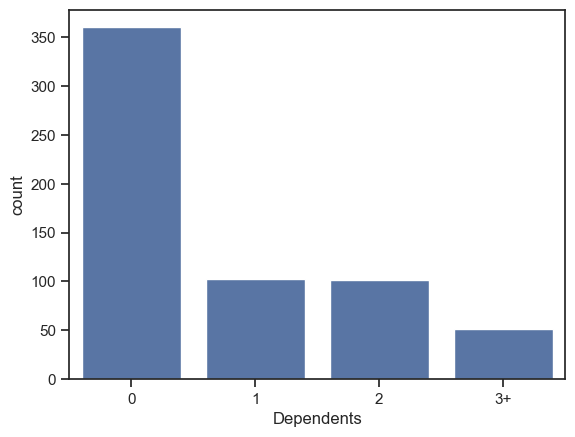

In [163]:
sns.countplot(x='Dependents',data=X_train)

In [165]:
X_train['Dependents']=X_train['Dependents'].map({0:0,1:1,2:2,'3+':3})

In [166]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural


In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 52.9+ KB


### Test Data Imputation

In [171]:
test=pd.read_excel('test.xlsx')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [172]:
test.drop("Loan_ID",inplace=True,axis=1)
X_test=test
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [173]:
X_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Imputing Numerical columns

In [174]:
num_columns = X_test.select_dtypes(exclude=['object'])
num_null_columns=num_columns.columns[num_columns.isnull().any()]
num_null_columns=list(num_null_columns)
num_null_columns

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [175]:
num_null_columns.remove('Credit_History')
num_null_columns

['LoanAmount', 'Loan_Amount_Term']

In [176]:
for col_name in num_null_columns:
    missing_val_imput_num(X_train,X_test,col_name)

Missing value imputaion for LoanAmount done
Missing value imputaion for Loan_Amount_Term done


In [177]:
X_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [178]:
X_test.loc[X_test['Credit_History'].isnull(),'Credit_History'] = 0

In [179]:
X_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

#### Imputing Categorical Columns

In [180]:
cat_columns = X_test.select_dtypes(include=['object'])
cat_null_columns=cat_columns.columns[cat_columns.isnull().any()]
cat_null_columns=list(cat_null_columns)
cat_null_columns

['Gender', 'Dependents', 'Self_Employed']

In [181]:
for col_name in cat_null_columns:
    missing_val_imput_cat(X_train,X_test,col_name)

Missing value imputaion for Gender done
Missing value imputaion for Dependents done
Missing value imputaion for Self_Employed done


In [182]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [190]:
X_test['Dependents']=X_test['Dependents'].map({0:0,1:1,2:2,'3+':3})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 31.7+ KB


### Outlier Handling

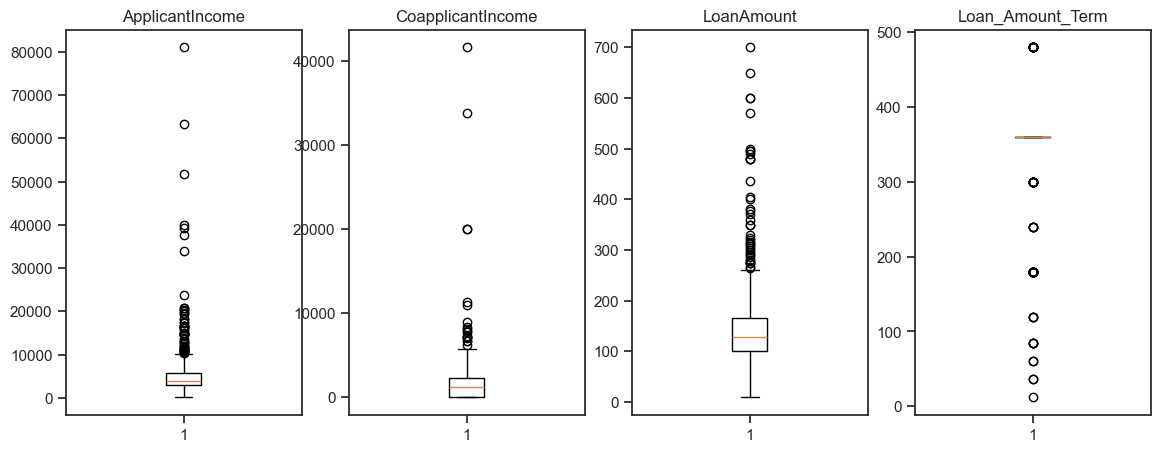

In [183]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,5))
axes[0].boxplot(X_train['ApplicantIncome'])
axes[0].set_title('ApplicantIncome')
axes[1].boxplot(X_train['CoapplicantIncome'])
axes[1].set_title('CoapplicantIncome')
axes[2].boxplot(X_train['LoanAmount'])
axes[2].set_title('LoanAmount')
axes[3].boxplot(X_train['Loan_Amount_Term'])
axes[3].set_title('Loan_Amount_Term')

fig.savefig("boxplots.png")

### OneHot encoding

##### Train Data

In [184]:
X_train.shape,X_test.shape,y_train.shape

((614, 11), (367, 11), (614,))

In [186]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural


In [185]:
cat_col_names=[colname for colname in X_train.columns if X_train[colname].dtype=='object']
cat_col_names

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [187]:
num_col_names=[colname for colname in X_train.columns if X_train[colname].dtype!='object']
num_col_names

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [188]:
X_train_dumm=pd.get_dummies(X_train,columns=cat_col_names,drop_first=True)
X_train_dumm

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,True,False,False,False,False,True
1,1,4583.0,1508.0,128.0,360.0,1.0,True,True,False,False,False,False
2,0,3000.0,0.0,66.0,360.0,1.0,True,True,False,True,False,True
3,0,2583.0,2358.0,120.0,360.0,1.0,True,True,True,False,False,True
4,0,6000.0,0.0,141.0,360.0,1.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,0.0,71.0,360.0,1.0,False,False,False,False,False,False
610,3,4106.0,0.0,40.0,180.0,1.0,True,True,False,False,False,False
611,1,8072.0,240.0,253.0,360.0,1.0,True,True,False,False,False,True
612,2,7583.0,0.0,187.0,360.0,1.0,True,True,False,False,False,True


In [189]:
X_train_dumm.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

#### Test data

In [191]:
X_test_dumm=pd.get_dummies(X_test,columns=cat_col_names,drop_first=True)
X_test_dumm

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,True,True,False,False,False,True
1,1,3076,1500,126.0,360.0,1.0,True,True,False,False,False,True
2,2,5000,1800,208.0,360.0,1.0,True,True,False,False,False,True
3,2,2340,2546,100.0,360.0,0.0,True,True,False,False,False,True
4,0,3276,0,78.0,360.0,1.0,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,True,True,True,True,False,True
363,0,4158,709,115.0,360.0,1.0,True,True,False,False,False,True
364,0,3250,1993,126.0,360.0,0.0,True,False,False,False,True,False
365,0,5000,2393,158.0,360.0,1.0,True,True,False,False,False,False


In [192]:
X_test_dumm.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

### Handling Numerical Variables__Standardization

In [193]:
# Standardization
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train_dumm[num_col_names])
X_test_standardized = scaler.transform(X_test_dumm[num_col_names])

X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)


print("Standardization done")

Standardization done


In [194]:
X_train_standardized

,0,1,2,3,4,5
0,-0.737806,0.072991,-0.554487,-0.211241,0.273231,0.540954
1,0.253470,-0.134412,-0.038732,-0.211241,0.273231,0.540954
2,-0.737806,-0.393747,-0.554487,-0.948996,0.273231,0.540954
3,-0.737806,-0.462062,0.251980,-0.306435,0.273231,0.540954
4,-0.737806,0.097728,-0.554487,-0.056551,0.273231,0.540954
...,...,...,...,...,...,...
609,-0.737806,-0.410130,-0.554487,-0.889500,0.273231,0.540954
610,2.236021,-0.212557,-0.554487,-1.258378,-2.522836,0.540954
611,0.253470,0.437174,-0.472404,1.276168,0.273231,0.540954
612,1.244745,0.357064,-0.554487,0.490816,0.273231,0.540954


In [195]:
X_train_standardized.columns = num_col_names
X_test_standardized.columns = num_col_names

In [196]:
X_train_standardized

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.737806,0.072991,-0.554487,-0.211241,0.273231,0.540954
1,0.253470,-0.134412,-0.038732,-0.211241,0.273231,0.540954
2,-0.737806,-0.393747,-0.554487,-0.948996,0.273231,0.540954
3,-0.737806,-0.462062,0.251980,-0.306435,0.273231,0.540954
4,-0.737806,0.097728,-0.554487,-0.056551,0.273231,0.540954
...,...,...,...,...,...,...
609,-0.737806,-0.410130,-0.554487,-0.889500,0.273231,0.540954
610,2.236021,-0.212557,-0.554487,-1.258378,-2.522836,0.540954
611,0.253470,0.437174,-0.472404,1.276168,0.273231,0.540954
612,1.244745,0.357064,-0.554487,0.490816,0.273231,0.540954


### Modeling_Tweeks

In [197]:
X_train_cat = X_train_dumm.drop(num_col_names,axis = 1)
X_test_cat = X_test_dumm.drop(num_col_names,axis = 1)

X_train_cat.reset_index(inplace=True,drop=True)
X_test_cat.reset_index(inplace=True,drop=True)

In [198]:
y_train.reset_index(inplace=True,drop=True)

In [199]:
### Concating the  Transformed Variables

In [200]:
# Concatenating the transformed varaible and createting a datset with transformed varaible

X_train_transformed = pd.concat([X_train_standardized,X_train_cat], axis = 1)

X_test_tarnsformed = pd.concat([X_test_standardized,X_test_cat], axis = 1)

print(X_train_transformed.shape)

print(X_test_tarnsformed.shape)

(614, 12)
(367, 12)


In [201]:
X_train_transformed

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.072991,-0.554487,-0.211241,0.273231,0.540954,True,False,False,False,False,True
1,0.253470,-0.134412,-0.038732,-0.211241,0.273231,0.540954,True,True,False,False,False,False
2,-0.737806,-0.393747,-0.554487,-0.948996,0.273231,0.540954,True,True,False,True,False,True
3,-0.737806,-0.462062,0.251980,-0.306435,0.273231,0.540954,True,True,True,False,False,True
4,-0.737806,0.097728,-0.554487,-0.056551,0.273231,0.540954,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,-0.410130,-0.554487,-0.889500,0.273231,0.540954,False,False,False,False,False,False
610,2.236021,-0.212557,-0.554487,-1.258378,-2.522836,0.540954,True,True,False,False,False,False
611,0.253470,0.437174,-0.472404,1.276168,0.273231,0.540954,True,True,False,False,False,True
612,1.244745,0.357064,-0.554487,0.490816,0.273231,0.540954,True,True,False,False,False,True


In [203]:
X_test_tarnsformed

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.051857,-0.554487,-0.425428,0.273231,0.540954,True,True,False,False,False,True
1,0.253470,-0.381297,-0.041468,-0.235040,0.273231,0.540954,True,True,False,False,False,True
2,1.244745,-0.066097,0.061136,0.740701,0.273231,0.540954,True,True,False,False,False,True
3,1.244745,-0.501872,0.316278,-0.544421,0.273231,-1.848585,True,True,False,False,False,True
4,-0.737806,-0.348532,-0.554487,-0.806205,0.273231,0.540954,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
362,2.236021,-0.228448,0.053270,-0.389730,0.273231,0.540954,True,True,True,True,False,True
363,-0.737806,-0.204038,-0.312000,-0.365932,0.273231,0.540954,True,True,False,False,False,True
364,-0.737806,-0.352791,0.127145,-0.235040,0.273231,-1.848585,True,False,False,False,True,False
365,-0.737806,-0.066097,0.263950,0.145737,0.273231,0.540954,True,True,False,False,False,False


In [216]:
y_train=pd.DataFrame(y_train,columns=['Loan_Status'])
y_train

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


### Functions to get evaluation metrics

In [218]:
# Function for evaluation reports
def get_eval(clf, X_train, y_train,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    #abclf_cm = confusion_matrix(y_test,y_pred)
    #print(abclf_cm)
    return

### Different classification Algorithms

##### Decision Tree Classifier

In [219]:
# fit, train and cross validate Decision Tree with training and test data 
def dectreeclf(X_train, y_train,X_test):
    start = time.time()

    print("DecisionTreeClassifier")
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = dec_tree.predict(X_test)
    
    # Get Cross Validation and Confusion matrix
    get_eval(dec_tree, X_train, y_train,y_pred)
        
    end = time.time()
    training_time = end-start
    print("Time taken: ", training_time)
    return

# Visualize tree and save as .pdf
# Only works for dataframes, not for numpy arrays

In [220]:
def visualize_tree(clf,X_train,y_train):
    dot_data = export_graphviz(clf, out_file=None) 
    graph = pydotplus.graph_from_dot_data(dot_data) 
    graph.write_pdf("dectreeclf.pdf") 
     
        
    dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=[str(x) for x in X_train.columns.tolist()], # feature names from X_train column names
                         class_names=[str(x) for x in clf.classes_],
                         filled=True, rounded=True,  
                         special_characters=True,
                         leaves_parallel=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    Image(graph.create_png()) 
    return

In [221]:
# Decisiontree
# Train, test and evaluate the classifiers with different preprocessed data
print("clean resampled")
dectreeclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
DecisionTreeClassifier
Cross Validation Accuracy: 0.66 (+/- 0.06)
Cross Validation Precision: 0.74 (+/- 0.04)
Cross Validation roc_auc: 0.64 (+/- 0.05)
Time taken:  0.8675100803375244


##### Random Forest Classifier

In [224]:
# fit, train and cross validate Decision Tree with training and test data 
def randomforestclf(X_train, y_train,X_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = randomforest.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(randomforest, X_train, y_train,y_pred)
    return

In [225]:
# Random Forest classifier
print("clean resampled")
randomforestclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
RandomForestClassifier


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Cross Validation Accuracy: 0.73 (+/- 0.04)
Cross Validation Precision: 0.78 (+/- 0.04)
Cross Validation roc_auc: 0.73 (+/- 0.04)


##### Logistic regression

In [226]:
# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = logreg.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(logreg, X_train, y_train,y_pred)
    return

In [227]:
# Logistic Regression
print("clean resampled")
logregclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
LogisticRegression


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Validation Accuracy: 0.77 (+/- 0.04)
Cross Validation Precision: 0.79 (+/- 0.03)
Cross Validation roc_auc: 0.74 (+/- 0.06)


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

##### K Neighbors Classifier

In [228]:
def knnclf(X_train, y_train, X_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = knn.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(knn, X_train, y_train,y_pred)
    return

In [229]:
# KNN Classifier
print("clean resampled")
knnclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
KNeighborsClassifier


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross Validation Accuracy: 0.72 (+/- 0.05)
Cross Validation Precision: 0.78 (+/- 0.04)
Cross Validation roc_auc: 0.69 (+/- 0.04)


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
